# Outlier Detection using Python

<b>Import Libraries<b/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Outlier is a datapoint which lies outside of the overall distribution of a dataset.

<b>Criteria to find an outlier<b/>


1.Data that falls above 1.5 times of IQR, above 3rd quartile and below 1st quartile
2.Data points which fall outside of 3 standard deviations, using z score.

<b>Creating a dataset for Visualization<b/>

In [7]:
dataset = [12,13,14,19,10,9,12,16,104,18,17,11,16,10,10,9,15,18,17,113,14,15,19,25,27,23,115,10,7,12]

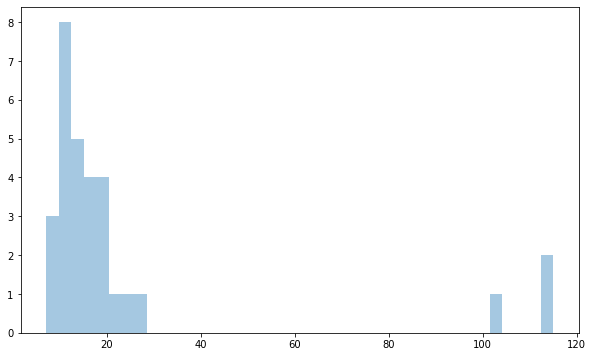

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(dataset, bins=40, kde=False)

<b>Detecting Outliers based on Z score<b/>

In [9]:
outliers = []

def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    standard_dev=np.std(data)
    
    for i in data:
        z_score= (i-mean)/standard_dev
        z_score= np.absolute(z_score)
        
        if z_score>3:
            outliers.append(i)
            
    return outliers


In [10]:
outliers = detect_outliers(dataset)

In [11]:
outliers

[113, 115]

<b>Detecting outliers based on IQR<b/>

In [12]:
sorted(dataset)

[7,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 12,
 12,
 12,
 13,
 14,
 14,
 15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 23,
 25,
 27,
 104,
 113,
 115]

<b>Calculate 1st and 3rd Quartile<b/>

In [14]:
quartile1 = np.percentile(dataset, 25)
quartile3 = np.percentile(dataset, 75)

In [15]:
print(quartile1,quartile3)

11.25 18.75


<b>Find Inter Quartile Range along with Lower & Upper bounds<b/>

In [17]:
iqr = quartile3-quartile1
iqr

7.5

In [21]:
lower_bound = quartile1 - (1.5*iqr)
upper_bound = quartile3 + (1.5*iqr)

In [22]:
print(lower_bound,upper_bound)

0.0 30.0


In [27]:
def detect_outlier_using_iqr(low,high,data):
    outliers = []
    for i in data:
        if(i>high or i<low):
            outliers.append(i)
    
    return outliers
        

In [28]:
iqr_outliers = detect_outlier_using_iqr(lower_bound,upper_bound,dataset)

In [29]:
print(iqr_outliers)

[104, 113, 115]
